# Clasificación

![blr](images/blr.jpeg)

### Ejemplo Churn

![churn](images/churn.png)


![churn2](images/churn2.png)



In [1]:
import pandas as pd                                # panel data, for handling dataframes
pd.set_option('display.max_columns', None)         # show all columns of the dataframe

import numpy as np                                 # numerical python, linear algebra library

import pylab as plt                                # plotting library
import seaborn as sns                              # plotting library
sns.set(style='white')                             # seaborn style


from sklearn.linear_model import LogisticRegression            # clasificar, logistic regression model   

from sklearn.preprocessing import StandardScaler               # standarized
from sklearn.preprocessing import LabelEncoder               

from sklearn.model_selection import train_test_split as tts    # split data into train and test sets


### Datos

In [2]:
df=pd.read_csv('../data/churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthLevel,TotalLevel,TenureLevel,ChurnBinary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low,Very Low,New,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Low,Moderate,Loyal,0.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Low,Very Low,New,1.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Low,Moderate,Loyal,0.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moderate,Very Low,New,1.0


In [3]:
df.shape

(7032, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

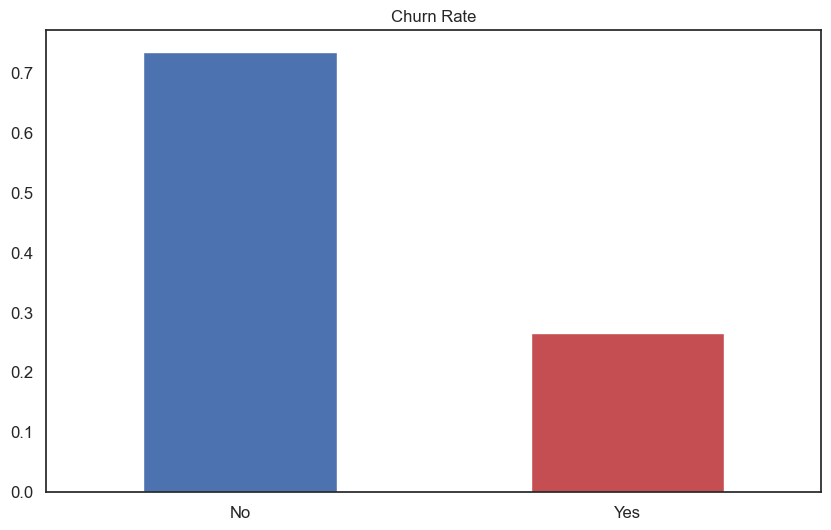

In [6]:
(df.Churn.value_counts()/len(df)).plot.bar(color=['b', 'r'],    # plot customer churn rate
                                           figsize=(10, 6),
                                           title='Churn Rate',
                                           rot=0,
                                           fontsize=12);


df.Churn.value_counts()/len(df)

### Transformacion

In [7]:
corr=df.corr()   # correlation matrix

corr

/var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ipykernel_60452/2548516525.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()   # correlation matrix


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,ChurnBinary
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
ChurnBinary,0.150541,-0.354049,0.192858,-0.199484,1.000000


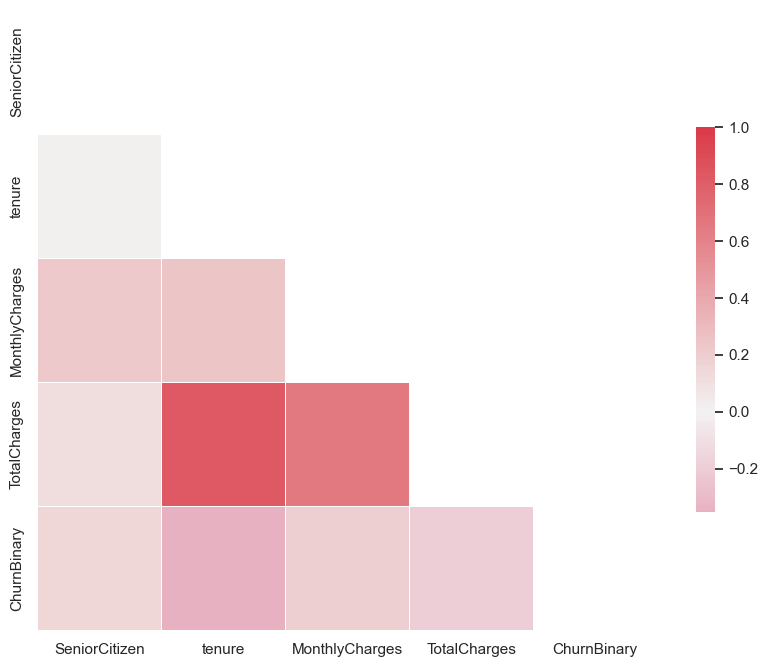

In [8]:
fig, ax=plt.subplots(figsize=(10,10))


mask=np.triu(np.ones_like(corr, dtype=bool))           # mask for superior triangular matrix


color_map=sns.diverging_palette(0, 10, as_cmap=True)   # color palette


# correlation heatmap
sns.heatmap(corr,                       # data
            mask=mask,                  # white mask
            cmap=color_map,             # color
            vmax=1,                     # vertical edge
            center=0,                   # plot center
            square=True,                # data square representation
            linewidth=.5,               # linewidth
            cbar_kws={'shrink': .5},    # lateral bar legend
            ax=ax                       # axes for plot size
           );

### Normalizacion

In [9]:
data_num=pd.DataFrame(StandardScaler().fit_transform(df._get_numeric_data()),
                      
                      columns=df._get_numeric_data().columns)


data_obj=df.select_dtypes(include='object')

data=pd.concat([data_num, data_obj], axis=1)

data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,ChurnBinary,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthLevel,TotalLevel,TenureLevel
0,-0.440327,-1.280248,-1.161694,-0.994194,-0.601663,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,Low,Very Low,New
1,-0.440327,0.064303,-0.260878,-0.173740,-0.601663,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,Low,Moderate,Loyal
2,-0.440327,-1.239504,-0.363923,-0.959649,1.662059,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,Low,Very Low,New
3,-0.440327,0.512486,-0.747850,-0.195248,-0.601663,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,Low,Moderate,Loyal
4,-0.440327,-1.239504,0.196178,-0.940457,1.662059,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,Moderate,Very Low,New


### Label Encoding

In [10]:
le=LabelEncoder()

for c in data.columns:
    
    if data.dtypes[c]==object:
        
        le.fit(data[c].astype(str))
        
        data[c]=le.transform(data[c].astype(str))

In [11]:
data.shape

(7032, 25)

In [12]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,ChurnBinary,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthLevel,TotalLevel,TenureLevel
0,-0.440327,-1.280248,-1.161694,-0.994194,-0.601663,5365,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,4,1
1,-0.440327,0.064303,-0.260878,-0.173740,-0.601663,3953,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,1,2,0
2,-0.440327,-1.239504,-0.363923,-0.959649,1.662059,2558,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,1,4,1
3,-0.440327,0.512486,-0.747850,-0.195248,-0.601663,5524,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,1,2,0
4,-0.440327,-1.239504,0.196178,-0.940457,1.662059,6500,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,2,4,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   float64
 1   tenure            7032 non-null   float64
 2   MonthlyCharges    7032 non-null   float64
 3   TotalCharges      7032 non-null   float64
 4   ChurnBinary       7032 non-null   float64
 5   customerID        7032 non-null   int64  
 6   gender            7032 non-null   int64  
 7   Partner           7032 non-null   int64  
 8   Dependents        7032 non-null   int64  
 9   PhoneService      7032 non-null   int64  
 10  MultipleLines     7032 non-null   int64  
 11  InternetService   7032 non-null   int64  
 12  OnlineSecurity    7032 non-null   int64  
 13  OnlineBackup      7032 non-null   int64  
 14  DeviceProtection  7032 non-null   int64  
 15  TechSupport       7032 non-null   int64  
 16  StreamingTV       7032 non-null   int64  


### Modelado

In [14]:
X=data.drop(['Churn', 'ChurnBinary', 'customerID'], axis=1)  # separacion X y

y=data.Churn

In [15]:
X.shape, y.shape

((7032, 22), (7032,))

In [16]:
# stratify mantiene la distribucion del objetivo

X_train, X_test, y_train, y_test=tts(X, y, 
                                     random_state=42,  # la semilla de numeros aleatorios
                                     stratify=y)

In [17]:
y_train.value_counts(), y_test.value_counts()

(0    3872
 1    1402
 Name: Churn, dtype: int64,
 0    1291
 1     467
 Name: Churn, dtype: int64)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5274, 22), (1758, 22), (5274,), (1758,))

In [19]:
# modelo

logreg=LogisticRegression(max_iter=2000)

In [21]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [22]:
y_pred=logreg.predict(X_test)

y_pred[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [24]:
y_prob=logreg.predict_proba(X_test)

y_prob[:10]

array([[0.32892511, 0.67107489],
       [0.98790709, 0.01209291],
       [0.5765804 , 0.4234196 ],
       [0.23556142, 0.76443858],
       [0.89875859, 0.10124141],
       [0.77167556, 0.22832444],
       [0.99340661, 0.00659339],
       [0.71596247, 0.28403753],
       [0.21860806, 0.78139194],
       [0.95868167, 0.04131833]])

In [25]:
# umbral 0.7

[1 if e[1]>0.7 else 0 for e in y_prob][:10]

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

In [26]:
sum(y_pred==y_test)/y_pred.shape[0] * 100   # acierto, accuracy

79.92036405005688

In [27]:
logreg.intercept_

array([-0.54253206])

In [28]:
logreg.coef_

array([[ 0.08539868, -0.83219269,  0.85838248,  0.08433841, -0.03686372,
         0.03387301, -0.23710976, -0.97976289,  0.1154813 ,  0.2183582 ,
        -0.29402933, -0.16667669, -0.06177041, -0.27830544,  0.02988564,
         0.0025462 , -0.77326615,  0.35112667,  0.07779736,  0.00184069,
         0.14602005,  0.04122884]])

In [29]:
dict(zip(X.columns, logreg.coef_[0]))

{'SeniorCitizen': 0.08539868236959465,
 'tenure': -0.8321926871172716,
 'MonthlyCharges': 0.8583824844263553,
 'TotalCharges': 0.08433841080067929,
 'gender': -0.03686372393583199,
 'Partner': 0.03387300814522088,
 'Dependents': -0.23710976353901453,
 'PhoneService': -0.9797628942090896,
 'MultipleLines': 0.11548129650973439,
 'InternetService': 0.21835819514377042,
 'OnlineSecurity': -0.29402932829746425,
 'OnlineBackup': -0.16667668557537293,
 'DeviceProtection': -0.06177041076275539,
 'TechSupport': -0.27830543627955723,
 'StreamingTV': 0.0298856390188927,
 'StreamingMovies': 0.0025462031506539766,
 'Contract': -0.7732661549701516,
 'PaperlessBilling': 0.35112666986468277,
 'PaymentMethod': 0.07779735781485148,
 'MonthLevel': 0.0018406937612011425,
 'TotalLevel': 0.14602005340631471,
 'TenureLevel': 0.041228843373144294}

In [30]:
y_pred_prime=[0 if e[1]<0.25 else 1 for e in y_prob]   # 1 si prob>0.25

y_pred_prime[:10]

[1, 0, 1, 1, 0, 0, 0, 1, 1, 0]

In [31]:
sum(y_pred_prime==y_test)/y_test.shape[0] * 100   # acierto, accuracy

72.6962457337884